In [1]:
import numpy as np
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches 

[Problem 1] function for finding impureness

In [2]:
def gini(n_class, n_sample):
    a = 0
    for i in n_sample:
        a += (i/n_class)**2
    impurity = 1 - a
    return impurity
        

In [3]:
gini(30, [15, 15])

0.5

In [4]:
gini(45, [15, 15, 15])

0.6666666666666667

In [5]:
gini(30, [18, 12])

0.48

[Problem 2] Function for finding information gain

In [6]:
def information_gain(lp_class, rp_class):
    n1 = sum(lp_class)
    n2 = sum(rp_class)
    p_sample = n1 + n2
    p_class = lp_class + rp_class
    p_gini = gini(p_sample, p_class)
    gini_n1 = gini(n1, lp_class)
    gini_n2 = gini(n2, rp_class)
    IG = p_gini - ((n1/p_sample) * gini_n1) - ((n2/p_sample) * gini_n2)
    return IG


In [7]:
information_gain(np.array([10, 30]), np.array([20,5]))

0.14319526627218937

In [8]:
def gini_(class1, class2):
    p_samp = class1 + class2
    gini = 2 * (class1/p_samp) * (class2/p_samp)
    return gini


In [9]:
gini_(15, 15)

0.5

[Problem 3] Learning
    

In [10]:
class ScratchDecesionTreeClassifierDepth1():
    
    def _gini(self, X, y):
        a = 0
        for i in np.unique(y):
            a += (len(y[y[:, 0] == i]) / len(X))**2
        self.gini = 1 - a
        return self.gini

    def _info_gain(self, X, y):
        n = len(X)
        IG = self._gini(X, y) - len(self.X_left) / n*self._gini(self.X_left, self.y_left) - len(self.X_right) /n * self._gini(self.X_right, self.y_right)
        return IG
        
        
    def fit(self, X, y):
        self.list_info_gain_max = []
        self.threshold_max = []

        for i in range(X.shape[1]):
            self.list_info_gain = []
            self.Threshold = []

            for j in np.unique(X[:, i]):
                self.Threshold.append(j)
                self.X_right = X[X[:,i] >= j]
                self.y_right = y[X[:,i] >= j]
                self.X_left = X[X[:,i] < j]
                self.y_left = y[X[:,i] < j]
                self.list_info_gain.append(self._info_gain(X, y))

            self.list_info_gain_max.append(max(self.list_info_gain))
            self.ind = self.list_info_gain.index(max(self.list_info_gain))
            self.threshold_max.append(self.Threshold[self.ind])

        self.ind2 = self.list_info_gain_max.index(max(self.list_info_gain_max))
        self.dicision_threshold = self.threshold_max[self.ind2]
        self.Greater_Label = stats.mode(y[X[:, self.ind2] >= self.dicision_threshold]).mode
        self.Less_label = stats.mode(y[X[:, self.ind2] < self.dicision_threshold]).mode

    def predict(self, x):
        self.y_pred = np.zeros(x.shape[0]).reshape(x.shape[0], 1)
        self.y_pred[x[: ,self.ind2] >= self.dicision_threshold] = self.Greater_Label
        self.y_pred[x[: ,self.ind2] < self.dicision_threshold] = self.Less_label
        return self.y_pred

        

[Problem 4] Estimate

In [11]:
data = load_iris()
X = data.data[50:,:]
y = data.target[50:]
X = X[:, [2,3]]

y = np.where(y == 1, 1, 0)
y = y.reshape(100, 1)

iris = np.hstack((y, X))

np.unique(iris[:,0])

array([0., 1.])

In [12]:
X.shape

(100, 2)

In [13]:
scratch = ScratchDecesionTreeClassifierDepth1()
scratch.fit(X, y)
scratch.predict(X)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

[Problem 5] Learning and Estimation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
scratch1 = ScratchDecesionTreeClassifierDepth1()
scratch1.fit(X_train, y_train)


In [15]:
y_pred = scratch.predict(X_test)

In [16]:
print('{}'.format(precision_score(y_test, y_pred)))
print('{}'.format(f1_score(y_test, y_pred)))
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('{}'.format(recall_score(y_test, y_pred)))

1.0
1.0
[[10  0]
 [ 0 10]]
1.0


[Problem 6] Visualization of decision area

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ['o','^']
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color = scatter_color[i], label = target_names[i]) for i in range(n_class)]
    
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


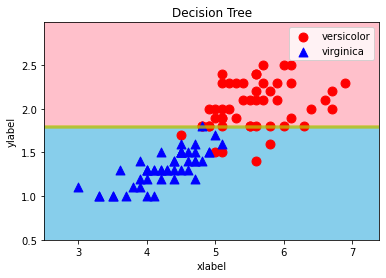

In [18]:
decision_region(X=X, y=y[:,0], model=scratch, step=0.01, title = 'Decision Tree', xlabel='xlabel', ylabel='ylabel')

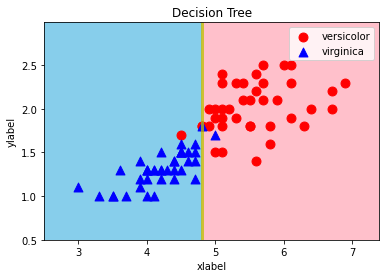

In [19]:
decision_region(X=X_train, y=y_train[:,0], model=scratch1, step=0.01, title = 'Decision Tree', xlabel='xlabel', ylabel='ylabel')